In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
##load the dataset to a pandas Dataframe
data=pd.read_csv("D:\project\creditcard.csv\creditcard.csv" , sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
selected_columns = fraud.loc[:, 'V4':'V14']

# Display the first few rows
print(selected_columns.head())  

            V4        V5        V6        V7        V8        V9       V10  \
541   3.997906 -0.522188 -1.426545 -2.537387  1.391657 -2.770089 -2.772272   
623   2.288644  1.359805 -1.064823  0.325574 -0.067794 -0.270953 -0.838587   
4920  2.330243 -0.821628 -0.075788  0.562320 -0.399147 -0.238253 -1.525412   
6108  2.679787 -1.128131 -1.706536 -3.496197 -0.248778 -0.247768 -4.801637   
6329  4.732795  3.624201 -1.357746  1.713445 -0.496358 -1.282858 -2.447469   

           V11        V12       V13       V14  
541   3.202033  -2.899907 -0.595222 -4.289254  
623  -0.414575  -0.503141  0.676502 -1.692029  
4920  2.032912  -6.560124  0.022937 -1.470102  
6108  4.895844 -10.912819  0.184372 -6.771097  
6329  2.101344  -4.609628  1.464378 -6.079337  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
#checking the number of missing values in each column
data.isnull().values.sum()

np.int64(0)

This dataset is highly unbalanced
0--> Normal transaction
1--> fraudulent transaction

In [3]:
#separating the data for analysis
legit=data[data.Class == 0]
fraud=data[data.Class == 1]
fractional_value=len(fraud)/len(legit)
print(fractional_value)
print("fraud cases:{}".format(len(data[data["Class"]==1])))
print("legit transactions:{}".format(len(data[data["Class"]==0])))


0.0017304750013189597
fraud cases:492
legit transactions:284315


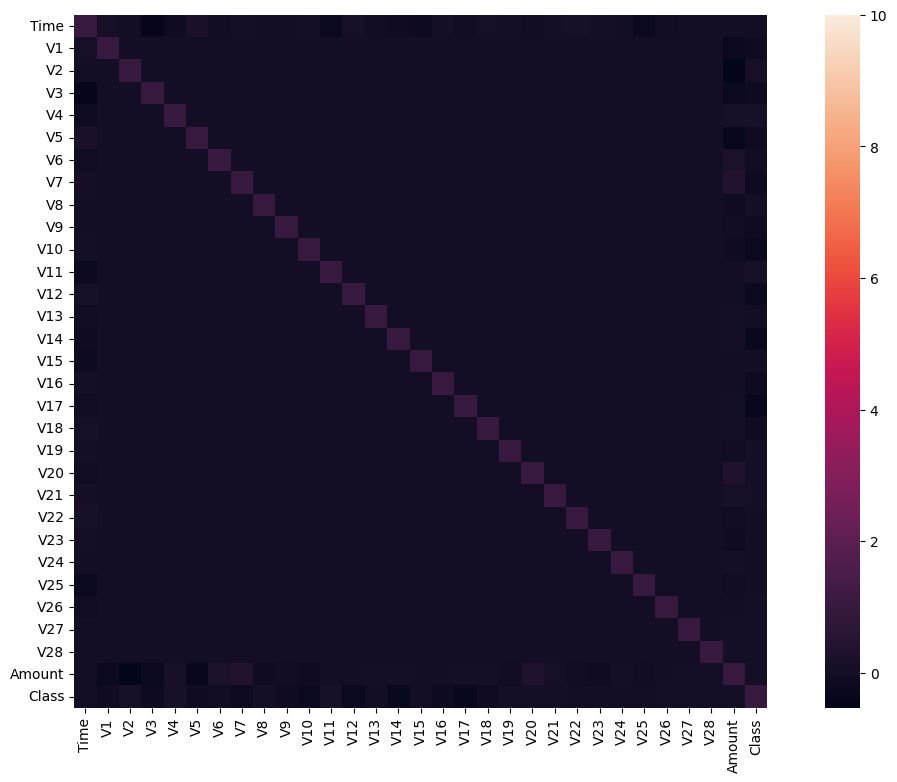

In [10]:
correlation=data.corr()
plotting=plt.figure(figsize=(15,9))
sns.heatmap(correlation,vmax=10, square=True)
plt.show()

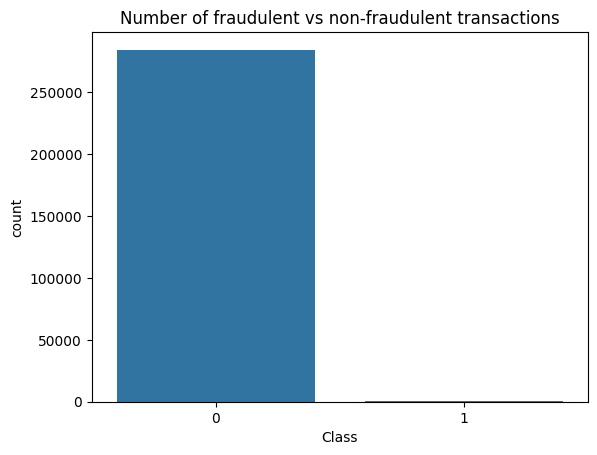

In [11]:
sns.countplot(x='Class',data=data)
plt.title("Number of fraudulent vs non-fraudulent transactions")
plt.show()

In [4]:
#splitting the data into features and targets
X=data.drop(columns=['Class', 'Time'])
Y=data['Class']
print(X.shape)
print(Y.shape)

(284807, 29)
(284807,)


In [13]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [5]:
#split the data into training  and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(284807, 29) (227845, 29) (56962, 29)


In [6]:
sm = SMOTE(random_state=42)
X_train_log, Y_train_log = sm.fit_resample(X_train, Y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test)

d:\MLFLOW1\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Model Training
Logistic Regression

In [7]:
model=LogisticRegression()
#training the logistic regression model with training data
model.fit(X_train_log, Y_train_log)
Y_pred_log=model.predict(X_test)
print(f"the accuracy of the model is  {round(model.score(X_test,Y_test)*100,2)}%")

d:\MLFLOW1\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the accuracy of the model is  97.76%


In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
n_outliers=len(fraud)
n_errors=(Y_pred_log != Y_test).sum()
print("Model is used logistic regression ")

acc= accuracy_score(Y_test,Y_pred_log)
print("The Accuracy is {}".format(acc))

pred=precision_score(Y_test,Y_pred_log)
print("the precision is {}".format(pred))

rec=recall_score(Y_test,Y_pred_log)
print("the recall is {}".format(rec))

f1=f1_score(Y_test,Y_pred_log)
print("the f1.score is {}".format(f1))

mcc=matthews_corrcoef(Y_test,Y_pred_log)
print("the matthews correlation coefficient is {}".format(mcc))

Model is used logistic regression 
The Accuracy is 0.977616656718514
the precision is 0.06632277081798084
the recall is 0.9183673469387755
the f1.score is 0.12371134020618557
the matthews correlation coefficient is 0.24352000399674698


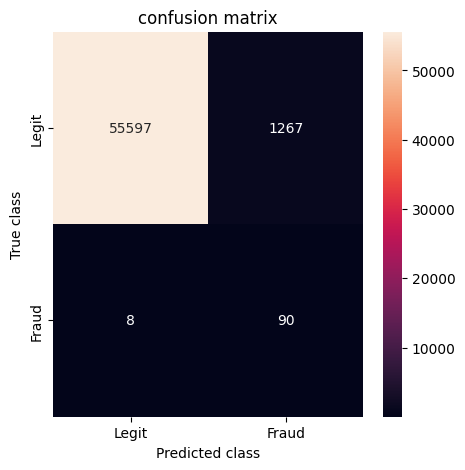

In [18]:
labels=["Legit","Fraud"]
conf_matrix=confusion_matrix(Y_test,Y_pred_log)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels=labels, annot=True,fmt="d");
plt.title("confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

Random forest classification

In [9]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, Y_train_log)
Y_pred=rfc.predict(X_test)

d:\MLFLOW1\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [10]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
n_outliers=len(fraud)
n_errors=(Y_pred != Y_test).sum()
print("Model is used Random Forest Classifier ")

acc= accuracy_score(Y_test,Y_pred)
print("The Accuracy is {}".format(acc))

pred=precision_score(Y_test,Y_pred)
print("the precision is {}".format(pred))

rec=recall_score(Y_test,Y_pred)
print("the recall is {}".format(rec))

f1=f1_score(Y_test,Y_pred)
print("the f1.score is {}".format(f1))

mcc=matthews_corrcoef(Y_test,Y_pred)
print("the matthews correlation coefficient is {}".format(mcc))


Model is used Random Forest Classifier 
The Accuracy is 0.9523190899195956
the precision is 0.017686072218128224
the recall is 0.4897959183673469
the f1.score is 0.034139402560455195
the matthews correlation coefficient is 0.08616929178485233


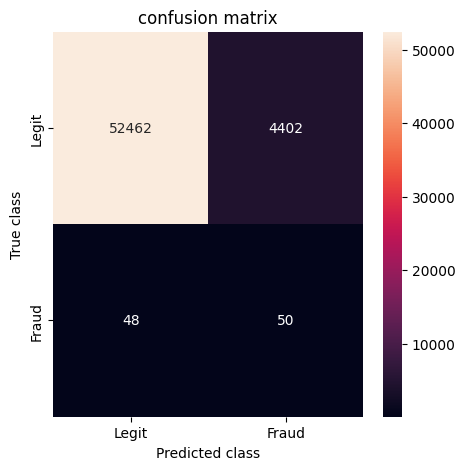

In [16]:
labels=["Legit","Fraud"]
conf_matrix=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels=labels, annot=True,fmt="d");
plt.title("confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

Advanced Model 

In [11]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train_log, Y_train_log)
    Y_pred = model.predict(X_test)
    
    print(f'--- {model_name} Evaluation ---')
    print(f'Accuracy: {accuracy_score(Y_test, Y_pred):.2f}')
    print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))
    print('Classification Report:', classification_report(Y_test, Y_pred))
    print(f'ROC AUC Score: {roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]):.2f}')

Training Logistic Regression...


d:\MLFLOW1\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression Evaluation ---
Accuracy: 0.98
Confusion Matrix: [[55629  1235]
 [    8    90]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

ROC AUC Score: 0.98
Training Random Forest...
--- Random Forest Evaluation ---
Accuracy: 1.00
Confusion Matrix: [[56860     4]
 [    4    94]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.96      0.96        98

    accuracy                           1.00     56962
   macro avg       0.98      0.98      0.98     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.99
Training XGBoost...


d:\MLFLOW1\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost Evaluation ---
Accuracy: 1.00
Confusion Matrix: [[56860     4]
 [    4    94]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.96      0.96        98

    accuracy                           1.00     56962
   macro avg       0.98      0.98      0.98     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 1.00


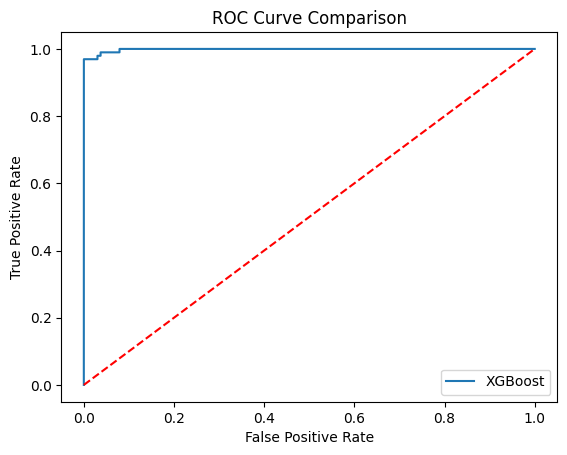

In [19]:
    # ROC Curve
    fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [12]:
important_columns = ['V14', 'V10', 'V4', 'V11', 'V12']
X = data[important_columns]
Y = data['Class']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

d:\MLFLOW1\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [13]:
# Train the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train_res)
Y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the RandomForestClassifier model
print("RandomForestClassifier:")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_rf)}")
print(f"Precision: {precision_score(Y_test, Y_pred_rf)}")
print(f"Recall: {recall_score(Y_test, Y_pred_rf)}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_rf)}")

RandomForestClassifier:
Accuracy: 0.9978582212703205
Precision: 0.43617021276595747
Recall: 0.8367346938775511
F1 Score: 0.5734265734265734


In [14]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, Y_train_res)
Y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the XGBClassifier model
print("XGBClassifier:")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_xgb)}")
print(f"Precision: {precision_score(Y_test, Y_pred_xgb)}")
print(f"Recall: {recall_score(Y_test, Y_pred_xgb)}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_xgb)}")

d:\MLFLOW1\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:46:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier:
Accuracy: 0.9922755521224677
Precision: 0.166015625
Recall: 0.8673469387755102
F1 Score: 0.2786885245901639


In [15]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("D:\project\creditcard.csv\creditcard.csv" )

# Select only the important features
selected_features = ['V14', 'V10', 'V4', 'V11', 'V12', 'Class']
df = df[selected_features]

# Split into features (X) and target (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(" Model Trained Successfully!")
print(f" Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")


d:\MLFLOW1\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:49:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Model Trained Successfully!
 Accuracy: 0.999403110845827
 Precision: 0.8809523809523809
 Recall: 0.7551020408163265
 F1 Score: 0.8131868131868132


In [16]:
import pickle
pickle.dump(rf_model,open('model_reg.pkl','wb'))
print("file was successfully created")

file was successfully created


In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features and Labels
feature_columns = ['V14', 'V10', 'V4', 'V11', 'V12']
X = data[feature_columns]
y = data['Class']

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, stratify=y_resampled)


# Create incremental model
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(loss='log_loss', random_state=42)
model_sgd.partial_fit(X_train, y_train, classes=[0, 1])

d:\MLFLOW1\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


SGDClassifier(loss='log_loss', random_state=42)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_sgd.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[44598   893]
 [ 5049 40441]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     45491
           1       0.98      0.89      0.93     45490

    accuracy                           0.93     90981
   macro avg       0.94      0.93      0.93     90981
weighted avg       0.94      0.93      0.93     90981



In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select features and labels
feature_columns = ['V14', 'V10', 'V4', 'V11', 'V12']
X = data[feature_columns]
y = data['Class']

# Split first (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE on the training set
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Now scale the resampled data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Train your model
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(loss='log_loss', random_state=42)
model_sgd.partial_fit(X_resampled_scaled, y_resampled, classes=[0, 1])


d:\MLFLOW1\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


SGDClassifier(loss='log_loss', random_state=42)

In [21]:
X_test_scaled = scaler.transform(X_test)
y_pred = model_sgd.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[55861  1003]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.92      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [22]:
fraud_prob = model_sgd.predict_proba(X_test_scaled)[:, 1]
custom_threshold = 0.9
y_pred_custom = (fraud_prob >= custom_threshold).astype(int)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[56680   184]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.32      0.89      0.47        98

    accuracy                           1.00     56962
   macro avg       0.66      0.94      0.73     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
import joblib
joblib.dump(model_sgd, 'model_sgd.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']